<img src="images/GMIT logo.jpeg" width="350" align="center">

# Fundamentals of Data Analysis Project 2019

<b>Name:</b> Peter McGowan<br>
<b>ID:</b> G00190832

## Introduction

<table><tr><td><img src="images/pandas_logo.png" width="350"></td><td><img src="images/matplotlib.jpg" width="250"></td></tr></table>

This Jupyter notebook has been created in order to describe and analyse the well known Tips Dataset. Considerable use of the Pandas library has been made for management, analysis and aggregation of the data. Visualisations have been predominantly produced using the Seaborn library, with elements of the Matplotlib Pyplot library used where required. The Numpy and Scipy Stats libraries are also used for some elements of statistical analysis.

## Setup

In [1]:
# Import pandas for managing data
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Magic command to ensure that plots render inline
%matplotlib inline

In [2]:
# Control Seaborn aesthetics
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

The tips dataset is conveniently included with Seaborn as a Pandas dataframe - so I can call it directly. I'll load it as "df".

In [3]:
df = sns.load_dataset("tips")

## Description

### Checking the Dataset

Before producing descriptive statistics, its a good idea to check the integrity and completeness of the dataset.

In [4]:
# Check the head
df.head(n=5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Check the tail
df.tail(n=5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
# Generate info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


Checking against the [Github page](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) for the tips dataset, I expect to see 244 entries - the data import has been successful and now I can move onto to a more detailed analysis.

### Basic Statistics

The describe() function in Pandas is very useful for an initial look at the properties of a dataset. I've also rounded all outputs to three decimal places - as I am most interested in analysing monetary amounts (which should be given to two decimal places), an additional decimal place should be sufficient for the purposes of analysis.

In [7]:
# Describe the dataset
round(df.describe(),3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


Describe() only produces an output on numerical columns - here it includes columns for total_bill (the total bill amount - a float), tip (the tip amount associated with the bill - float) and size (the size of the party billed - integer). I can make the following observations:
* Each column has a count of 244, indicating that there are no missing values;
* The means seem reasonable (pending an analysis of the distribution) - just under \\$20 for the mean total bill, a mean tip of \\$3 (equating to 15% of the average total bill which seems realistic) and the mean party size is just over 2.5;
* The Standard Deviation indicates the dispersion - as expected, the total bill has a fairly wide dispersion whereas the smaller values for tip and size shows that their values tend relatively closely to the mean;
* The Min and Max values lead to some interesting observations:
    * The smallest bill recorded is quite low (\\$3.07) - most likely referring to a single customer ordering 1-2 items. The largest bill is \\$50.81 which seems fairly unremarkable;
    * The smallest tip is \\$1.00 - tipping with a single dollar bill seems likely. The largest tip is $10.00 - another convenient denomination of money;
    * The size varies between 1 and 6. A minimum different to 1 would be unusual, whereas 6 may represent the largest table size available;
* The percentiles (25%, 50%/ median, 75%) are quite in line with the other observations. The median value is lower than the mean for all columns - I would therefore expect that the distribution of all columns is not particularly symmetrical.

Before moving on I'll also sum the numerical columns to get an appreciation of what the dataset represents.

In [8]:
# Sum numerical columns only
df.sum(axis = 0, skipna = True, numeric_only = True)

total_bill    4827.77
tip            731.58
size           627.00
dtype: float64

Therefore the dataset is representing a total of 627 customers in 244 parties, spending a total of \\$4827.77 and tipping \\$731.58 on that.

### Distribution

The aim of this analysis mainly is to investigate whether a relationship exists between the total bill and the tip. Firstly I will look at the distribution - I had make several assumptions above that I'd like to check out. I'll display the histograms of both columns using Seaborn's distplot() function. I also want to see the mean dollar value for each, so I'll display it as a vertical dashed line with the same colour as the distplot.

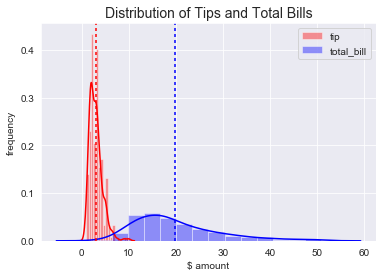

In [9]:
# Visualising the distribution of the total_bill and tip columns
sns.distplot(df['tip'], label = "tip", color = 'r')
sns.distplot(df['total_bill'], label = "total_bill", color = 'b')
#sns.distplot(df['size'], label = "size")
plt.xlabel("$ amount")
plt.ylabel("frequency")

plt.axvline(x = np.mean(df['tip']), color = 'r', dashes=(2,2,2,2))
plt.axvline(x = np.mean(df['total_bill']), color = 'b', dashes=(2,2,2,2))

plt.title('Distribution of Tips and Total Bills', fontsize=14)
plt.legend()

The distplot() in Seaborn includes a number of elements that can be seen in this example. The x-axis here displays the variable being analysed, whilst the y-axis shows the frequency of observations between 0.0 (0%) and 1.0 (100%). The observations are grouped into a number of "bins"<sup>[1](#myfootnote1)</sup>, i.e. divisions of the range of data - this can be manually controlled but here I have let Seaborn select it. These bins are displayed as rectangles, the horizontal extent showing the range of the bin, whereas the vertical extent displays the frequency of observations within the bin. Additionally, this plot includes a Kernal Density Estimate (KDE)<sup>[2](#myfootnote2)</sup> plot overlaid on it - this can be thought of as a line marking the probability of variable frequencies based on a limited number of observations. This results in a smoothed line which aids in understanding the distribution of the data being analysed.

The mode of the data is at the highest point of each distribution on the plot - in both cases the mean (marked by a dashed vertical line) is to the right of the mode, indicating positive skewness<sup>[3](#myfootnote3)</sup>. The resulting plot aligns well with the statistics shown above, as expected. Additionally it shows that both columns' data are positively skewed. I can confirm this by calculating the skewness of the two columns.

In [10]:
# importing scipy.stats to use the skewness function
import scipy.stats as ss

In [11]:
print("tip skewness: ", ss.skew(df['tip']))
print("total_bill skewness: ", ss.skew(df['total_bill']))

tip skewness:  1.4564266884221506
total_bill skewness:  1.1262346334818638


Both figures are positive, confirming that the columns are both positively skewed.

Before moving on I'd like to look into the non-numerical columns a little:
* sex: male or female;
* smoker: yes or no;
* day: the values in the head() and tail() outputs only show certain days - it's worth having a look in more detail to see if it only covers certain days;
* time: only dinner is shown in the head() and tail() outputs - I'll investigate this further also;

Firstly I'll generate the unique values for the day column and the time column respectively.

In [12]:
df.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [13]:
df.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

There are therefore only records for Thursday through Sunday, and for Lunch and Dinner. I can plot the distributions of these separately:

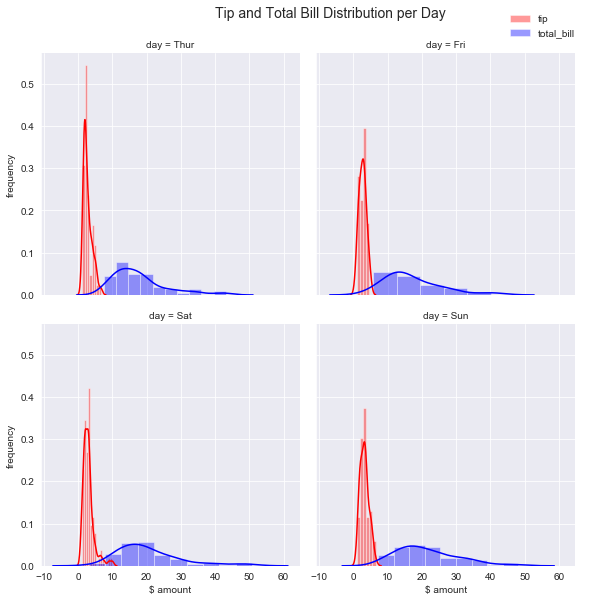

In [14]:
# Build a 2x2 facet grid plot with a distplot for each unique value in the "day" column
g = sns.FacetGrid(df, col="day", height=4, col_wrap=2)
g = g.map(sns.distplot, "tip", label = "tip", color='r')
g = g.map(sns.distplot, "total_bill", label = "total_bill", color='b')
g.axes[2].set_xlabel('$ amount')
g.axes[3].set_xlabel('$ amount')
g.axes[0].set_ylabel('frequency')
g.axes[2].set_ylabel('frequency')

g.fig.suptitle('Tip and Total Bill Distribution per Day', y=1.04, fontsize=14)
g.add_legend(bbox_to_anchor=(0.9,1))

This tells us that the distributions are slightly different on each day for both tips and total_bill. In addition, the peaks for both are somewhat higher on the Thrursday than for the other three days. I'll also plot the distribution of each for Lunch and Dinner separately:

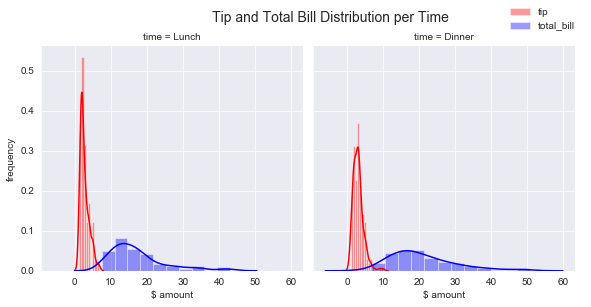

In [15]:
# Build a 1x2 facet grid plot with a distplot for each unique value in the "time" column
g = sns.FacetGrid(df, col="time", height=4, col_wrap=2)
g = g.map(sns.distplot, "tip", label = "tip", color='r')
g = g.map(sns.distplot, "total_bill", label = "total_bill", color='b')
g.axes[0].set_xlabel('$ amount')
g.axes[1].set_xlabel('$ amount')
g.axes[0].set_ylabel('frequency')

g.fig.suptitle('Tip and Total Bill Distribution per Time', y=1.04, fontsize=14)
g.add_legend(bbox_to_anchor=(0.9,1))

The distribution of the tip and total_bill columns are both narrower for lunch bills than for dinner bills. There is therefore a smaller variation in both tips and bills for lunches rather than dinners.

## Regression

Next we need to determine whether or not there is a relationship between the total bill and tip amount.

### Visually Relating Tips and Total Bills

Firstly, it will be helpful to look at some visual comparisons.

We can plot boxplots of the tip and total_bill columns. Instead of creating separate plots it should be easier to appreciate their similarities and differences by displaying on a single plot. This will require the dataframe to be "melted" - it will be restructured with columns combined etc. In this case we will create a melted dataframe<sup>[4](#myfootnote4)</sup> with the following:
* day - unpivoted;
* time - unpivoted;
* item - new column, its value will state whether the row refers to a tip or a total_bill;
* amount - a float with the tip or total_bill amount as appropriate.

In [16]:
# Set the day and time columns as id_vars - this will ensure that they remain unpivoted
dfmelted = df.melt(id_vars=["day", "time"], value_vars=["total_bill", "tip"], var_name="item", value_name="amount")
dfmelted

,day,time,item,amount
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59
...,...,...,...,...
483,Sat,Dinner,tip,5.92
484,Sat,Dinner,tip,2.00
485,Sat,Dinner,tip,2.00
486,Sat,Dinner,tip,1.75


The melted dataframe contains 488 rows - as the original dataframe contained 244, and we melted two columns together, this is correct. The boxplots can now be generated.

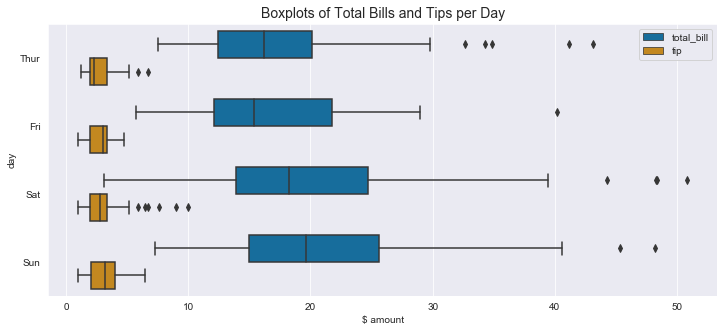

In [17]:
# Set size in order to see plot elements correctly
fig, ax = plt.subplots(figsize=(12, 5))

# Use the melted dataframe for this
sns.boxplot(data=dfmelted, y="day", x="amount", hue="item")

plt.xlabel("$ amount")

plt.title('Boxplots of Total Bills and Tips per Day', fontsize=14)
plt.legend(loc="upper right", bbox_to_anchor=(1, 1))

The boxplot<sup>[5](#myfootnote5)</sup> (or box and whisker plot) is a useful plot which can graphically display some properties of the variable being analysed quite well:
* The x-axis here is displaying the variable being measured - the amount column of our melted dataframe which is actually a combination of our tip amounts and total bill amounts;
* The rectangular box with its left and right extents showing the lower and upper quartile respectively, whilst the median is shown as a vertical line within the box;
* Whiskers extending to either side of the box covering a range equal to 1.5 times the interquartile range (upper quartile - lower quartile) maximum, or to the extent of observations;
* Outlier markers (diamond-shaped), for data points that are outside of the whiskers.

There are some interesting takeaways from this plot:
* The outliers (where present) are all above the upper quartile;
* Total bills are generally higher on Saturdays and Sundays but also have a wider range in general than those on Thursdays and Fridays;
* The tip ranges on Thursdays and Fridays are quite similar, particularly in terms of lower and upper quartile. Saturday's tips have a similar interquartile range but also a significant number of outliers whereas the range for Sundays's tips include no outliers but have a higher median and upper quartile as well as a wider interquartile range.

### Bivariate Plots

The previous plots shown can be categorised as univariate plots as they display data about a single variable in the dataset. We can now move on to looking at bivariate plots which can relate two variables on a single plot - this will be necessary for understanding the relationships between the variables.

Seaborn's jointplot is convenient for an initial look at the relationship between total bills and tips. It is implemented below with a number of elements:
1. A central "regression plot", combining:
    1. A scatterplot - a simple x-y plot of variables;
    2. A line showing a "linear regression" model fit, with a 95% confidence interval<sup>[6](#myfootnote6)</sup>;
2. A 2-D KDE plot with 10 "levels" overlaid on the regression plot, emphasising the density of observations;
3. A complementary distplot (including KDE plot) on each axis, showing tips and total bill.

Text(0.5, 1.03, 'Jointplot - Tips vs Total Bill Amounts')

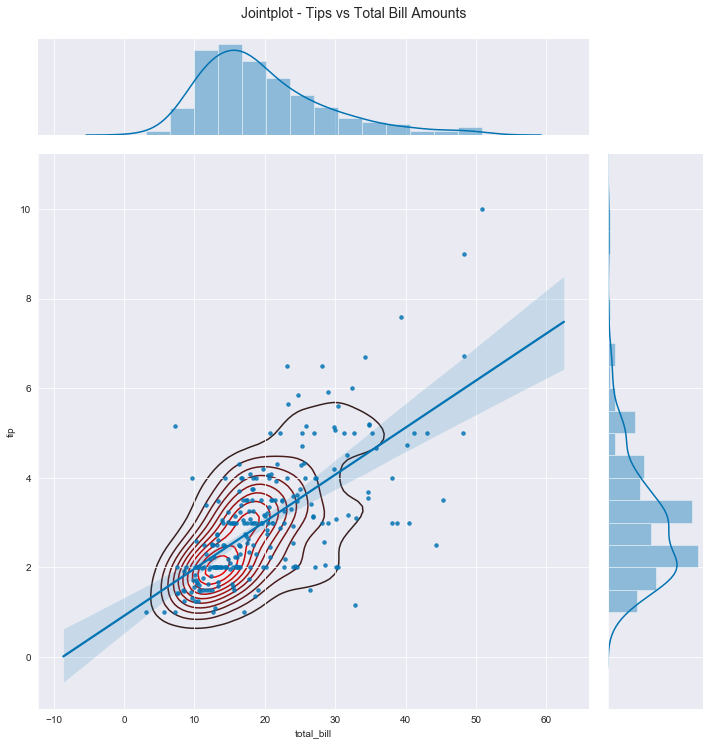

In [18]:
# Build a jointplot of the total_bill vs tip columns, as a regplot but with a kde plot overlaid
g = sns.jointplot(x ='total_bill', y ='tip', kind="reg", ci=95, height=10, data = df, scatter_kws={"s": 12}).plot_joint(sns.kdeplot, zorder=0, n_levels=10, color="r")

g.fig.suptitle("Jointplot - Tips vs Total Bill Amounts", y=1.03, fontsize=14)

Particularly with the aid of the 2-D KDE plot and the linear regression line, we can see that it is likely that some sort of relationship can be said to exist between the total bills and tips.

We can now concentrate on visualising the linear relationship through the observations with lmplot(). Firstly looking at the entire dataset gives us a similar output to the jointplot, with unnecessary detail stripped away:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills')

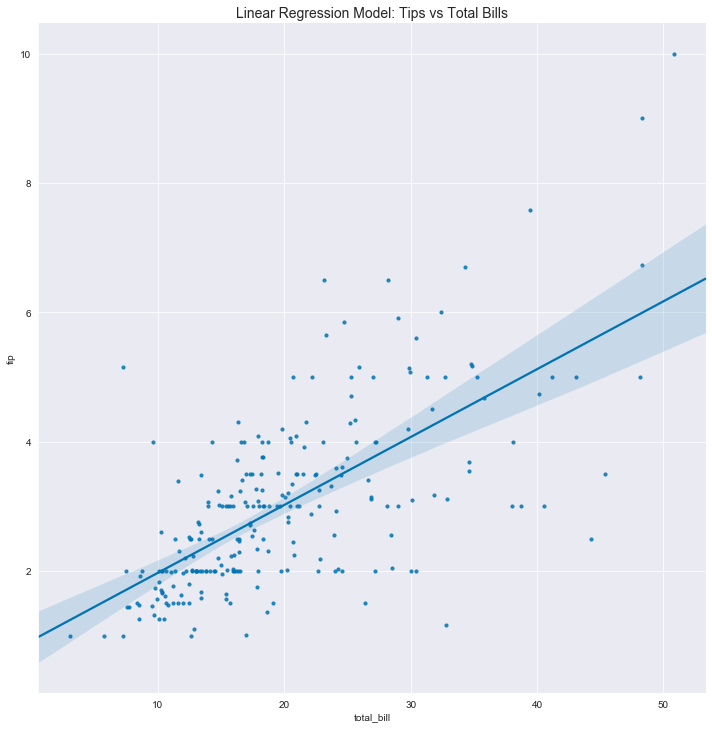

In [19]:
# Build a lmplot with a confidence interval of 95%
sns.lmplot(x="total_bill", y="tip", data=df, ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills', fontsize=14)

This looks to be reasonably representative, but it may be helpful to do some additional calculations. Using Numpy, we can calculate the correlation coefficient<sup>[7](#myfootnote7)</sup>, <sup>[8](#myfootnote8)</sup> as a 2x2 matrix (representing x/x, x/y, y/x, y/y). From this, we can then work out the $R^2$<sup>[9](#myfootnote9)</sup> value of the line.

In [20]:
# Use numpy to generate the correlation matrix
R = np.corrcoef(df['total_bill'], df['tip'])
print("Correlation Matrix (R): \n", R)

# Generate R Squared from the top right diagonal
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.67573411]
 [0.67573411 1.        ]]

R Squared:  0.45661658635167623


The result is an $R^2$ of approx. 45.66%. Therefore the model somewhat fits the data and we can be reasonably confident that there is a relationship between the total bill and the tip amount, although there are probably other factors at play also.

The Cost function<sup>[10](#myfootnote10)</sup> can also be calculated to assess the difference between the real values and the best-fit line. It can be calculated as follows: <br><br>$$ Cost(m,c) = {\sum_i (y_i - m x_i - c )^2}$$

Although we have some of the required data, we will also need to calculate the slope (m) and the y-intercept (c). The slope can be calculated using the following equation: <br><br>$$ m = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}$$

Where:
* $x_i, y_i$ = ith value of x, y
* $\bar{x}, \bar{y}$ = mean value of x, y


Once the slope has been calculated, the y-intercept can be worked out as follows: $$ c = \bar{y} - m \bar{x} $$

In [21]:
# Calculate slope (m) and y-intercept (c)

# Create variables to hold the values of the relevant columns
x_i = df['total_bill']
y_i = df['tip']

# Create variables to hold the mean values of the relevant columns
x_mean = np.mean(df['total_bill'])
y_mean = np.mean(df['tip'])

# Calculate m
m = np.sum((x_i - x_mean) * (y_i - y_mean)) / np.sum((x_i - x_mean)**2)

# Calculate c
c = y_mean - m * x_mean

print("m: %10.8f\nc: %10.8f" % (m, c))

m: 0.10502452
c: 0.92026961


I can also try out the numpy polyfit() function that will output m and c as elements of a 1x1 array.

In [22]:
# Use numpy's polyfit function
PF = np.polyfit(df['total_bill'], df['tip'], 1)
print("Polyfit")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit
m: 0.10502452
c: 0.92026961


The results match those manually calculated, so we can feel comfortable using this function for further analysis.

Now that we have m and c, the Cost function can be used:

In [23]:
# Implement the Cost Function
C = np.sum((y_i - (m * x_i) - c)**2)
print("Cost:", C)

Cost: 252.78874385077603


The cost is approx. 252.79. A lower cost will indicate a better model fit<sup>[11](#myfootnote11)</sup> - this figure in isolation doesn't tell us too much, but it will be a useful baseline for when we carry out further analysis.

## Analyse

### Using the Data

We now have some handle on the data - what it consists of and the distribution of some of its variables. But what is it useful for? It will be helpful to take the point of view of an employee of the restaurant. For convenience we'll assume that the employee waits tables on certain days of the week and has recorded certain information over a number of shifts with the aim of selecting work patterns that will maximise their earnings -  i.e. the employee wants to choose shifts and tables in order to get the largest tips!

Earlier, we had noted that, whilst the linear regression model fitted reasonably well, it probably wasn't telling the entire story. This means that other factors are likely affecting the value of the tips. We can now delve into the other variables and check if they are having an effect on the linear regression model.

### Tips vs Total Bills on Different Days

We had previously noted that bills and tips were distributed differently on different days. Now we can plot an lmplot() distinguishing the data points by day.

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills by Day')

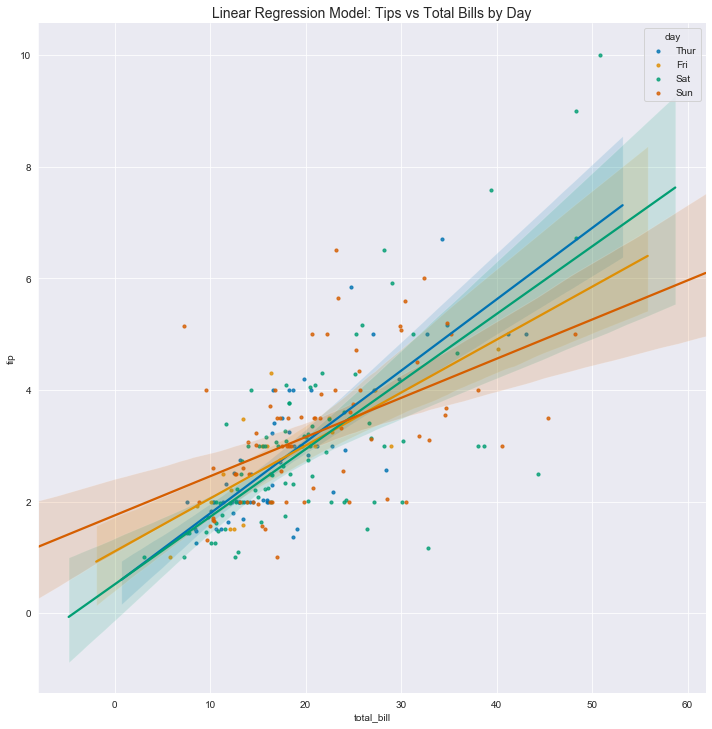

In [24]:
# Lmplot, this time with "day" as a hue
sns.lmplot(x="total_bill", y="tip", hue="day", ci=95, data=df, scatter_kws={"s": 10}, legend_out=False, height=10)

plt.title('Linear Regression Model: Tips vs Total Bills by Day', fontsize=14)

Interestingly this generates 4 slightly different linear regression models. There is some overlap of the confidence intervals but they are different enough to tell us that the day seems to have an effect on the relationship between tips and total bills. Before we take it at face value its a good idea to assess the fit of each model individually - this will make it easier to check if they are accurate.

Text(0.5, 1.02, 'Linear Regression Model: Tips vs Total Bills by Day (Separate)')

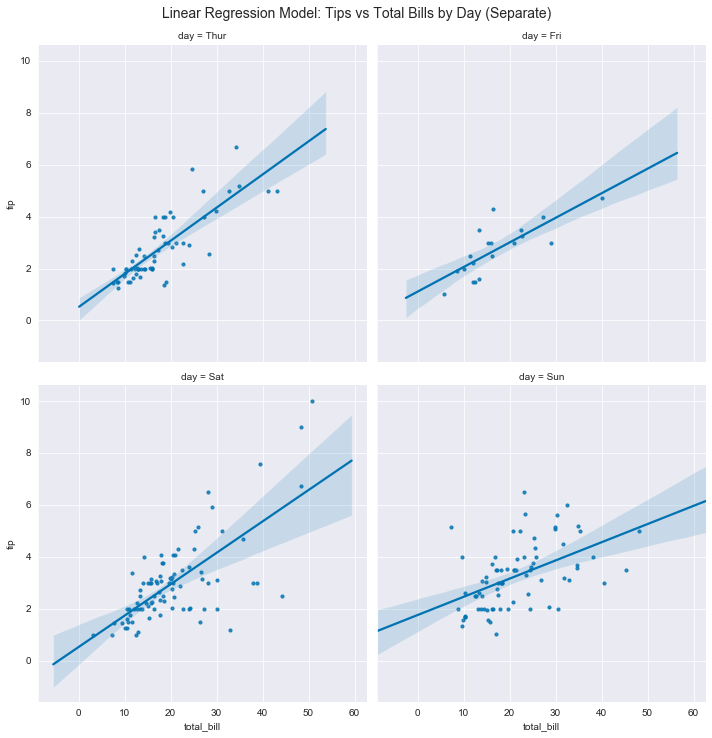

In [25]:
# Create 2x2 plots of individual lmplot per day
g =sns.lmplot(x="total_bill", y="tip", col="day", data=df, ci=95, scatter_kws={"s": 10}, col_wrap=2)

g.fig.suptitle('Linear Regression Model: Tips vs Total Bills by Day (Separate)', y=1.02, fontsize=14)

Thursday and Friday look like fairly good fits, but Saturday and Sunday are less certain. We will look at each in more detail.

#### Thursday

Taking Thursday, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills on Thursday')

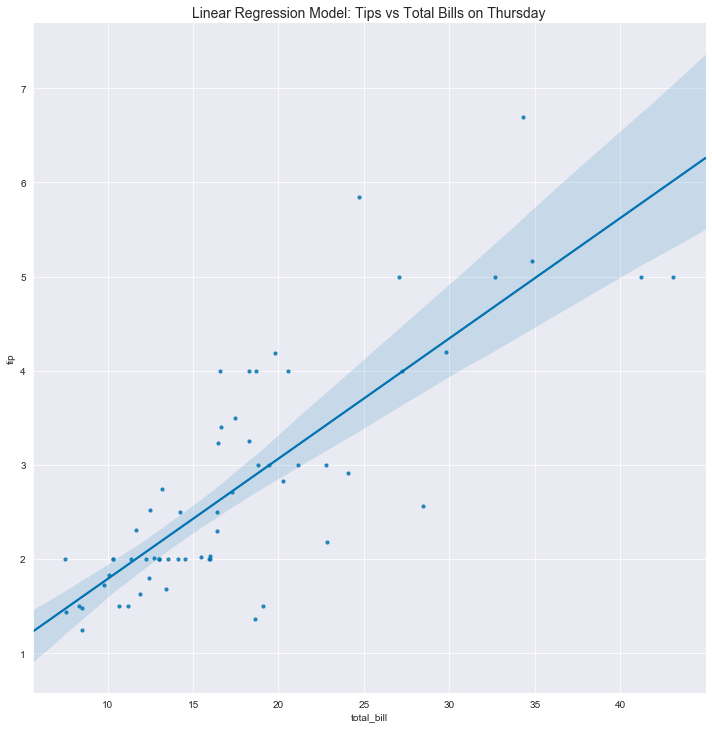

In [26]:
# Build a new dataframe by extracting from the full one using the query function
dfThur = df.query('day == "Thur"')

sns.lmplot(x="total_bill", y="tip", data=dfThur, ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills on Thursday', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [27]:
# R Squared for Thursday
x = dfThur["total_bill"]
y = dfThur["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.        0.8124063]
 [0.8124063 1.       ]]

R Squared:  0.6600040012990778


In [28]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Thursday: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Thursday: 
m: 0.12776355
c: 0.51224166


In [29]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Thursday: ", C)

Cost for Thursday:  31.900930149278725


The results are as follows:
* $R^2$: Around 66%
* Cost: Approx 31.90

These results indicate that the model fits the data on this day noticeably better than the overall fit of the dataset.

#### Friday

Taking Friday, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills on Friday')

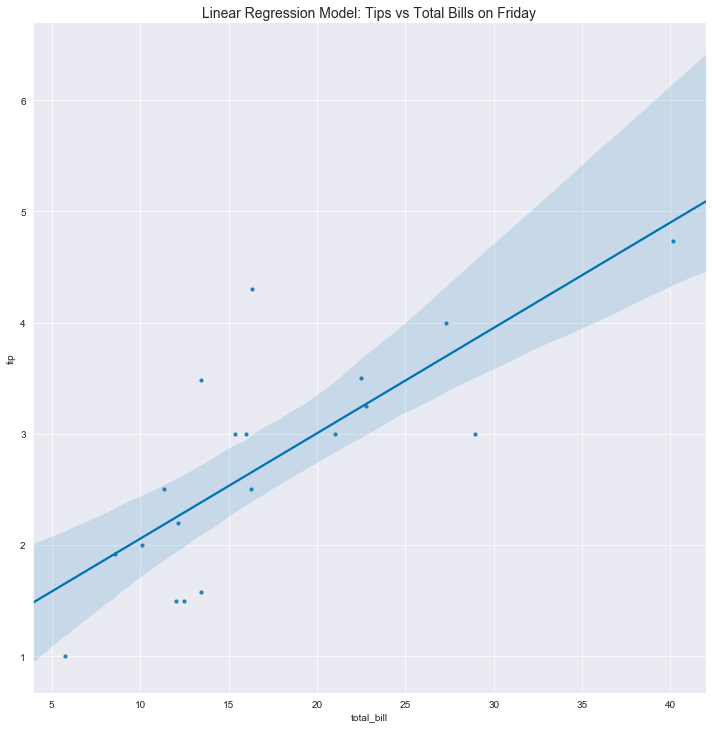

In [30]:
dfFri = df.query('day == "Fri"')

sns.lmplot(x="total_bill", y="tip", data=dfFri, ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills on Friday', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [31]:
# R Squared for Friday
x = dfFri["total_bill"]
y = dfFri["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.77193383]
 [0.77193383 1.        ]]

R Squared:  0.5958818313145857


In [32]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Friday: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Friday: 
m: 0.09479445
c: 1.10886240


In [33]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Friday: ", C)

Cost for Friday:  7.561727302302219


The results are as follows:
* $R^2$: Around 59.59%
* Cost: Approx 7.56

These results indicate that the model fits the data on this day noticeably better than the overall fit of the dataset.

#### Saturday

Taking Saturday, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills on Saturday')

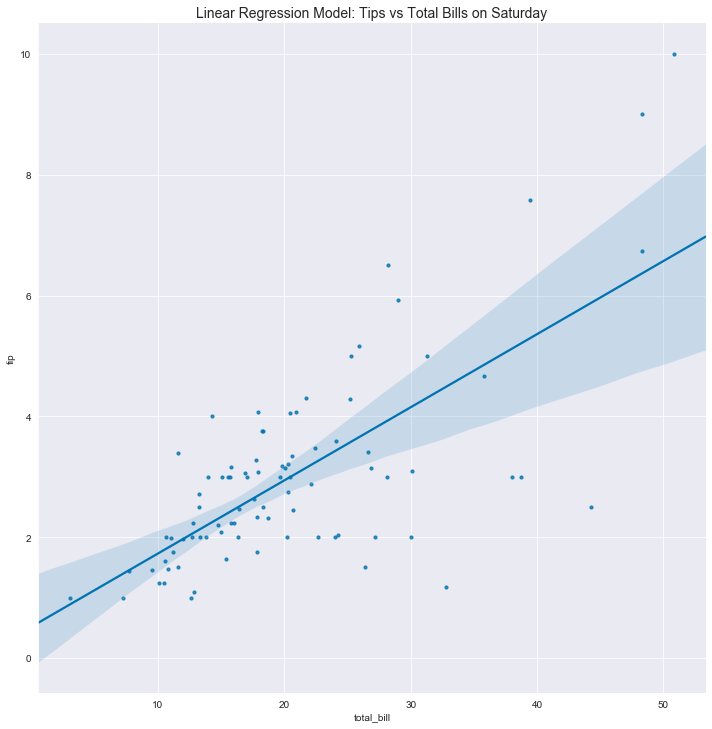

In [34]:
dfSat = df.query('day == "Sat"')

sns.lmplot(x="total_bill", y="tip", data=dfSat, ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills on Saturday', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [35]:
# R Squared for Saturday
x = dfSat["total_bill"]
y = dfSat["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.70363213]
 [0.70363213 1.        ]]

R Squared:  0.49509817306966714


In [36]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Saturday: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Saturday: 
m: 0.12105310
c: 0.51861109


In [37]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Saturday: ", C)

Cost for Saturday:  115.51036051983628


The results are as follows:
* $R^2$: Around 49.51%
* Cost: Approx 115.51

These results indicate that the model fits the data on this day somewhat better than the overall fit of the dataset, but not as well as on Thursday or Friday.

#### Sunday

Taking Sunday, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills on Sunday')

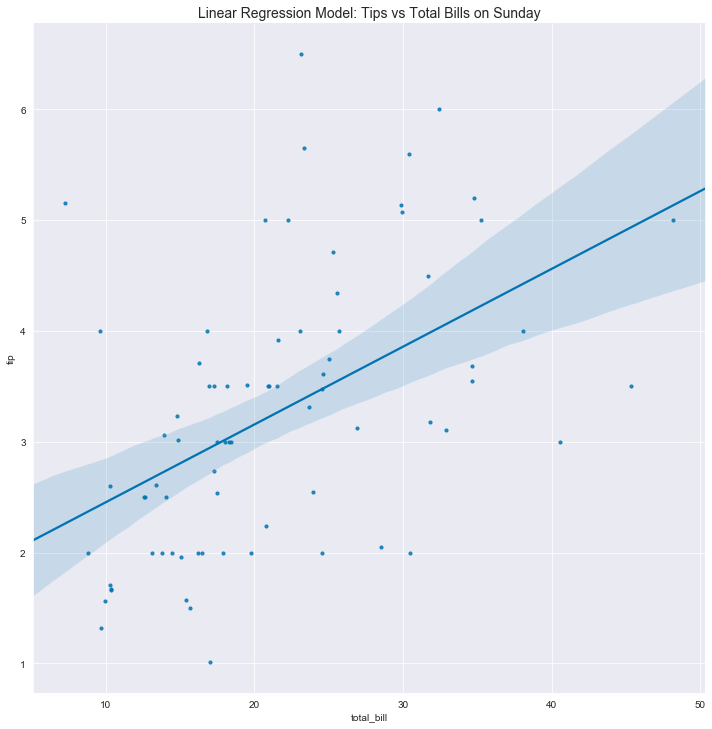

In [38]:
dfSun = df.query('day == "Sun"')

sns.lmplot(x="total_bill", y="tip", data=dfSun , ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills on Sunday', fontsize=14)

The linear regression plot looks much less representative than the others, this does not inspire confidence for the remainder of the calculations for Sunday. Next we will calculate the $R^2$ value:

In [39]:
# R Squared for Sunday
x = dfSun["total_bill"]
y = dfSun["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.50175271]
 [0.50175271 1.        ]]

R Squared:  0.2517557802128974


In [40]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Sunday: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Sunday: 
m: 0.07015353
c: 1.75314449


In [41]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Sunday: ", C)

Cost for Sunday:  85.57646595925311


The results are as follows:
* $R^2$: Around 25.18%
* Cost: Approx 85.58

These results are not as encouraging as those for other days. Although the Cost function is much better than on the overall dataset, the $R^2$ is significantly worse.

#### Results

Breaking it down by day does seem to give a more accurate linear model. We can therefore be confident that there is a relationship between day and tip size also. However, there remains some room for improvement, therefore other variables are likely to be having an impact also.

### Tips vs Total Bills for Different Mealtimes

Perhaps the mealtime will have some bearing on the tips also. First we will plot an lmplot() distinguishing the data points by time:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills by Time')

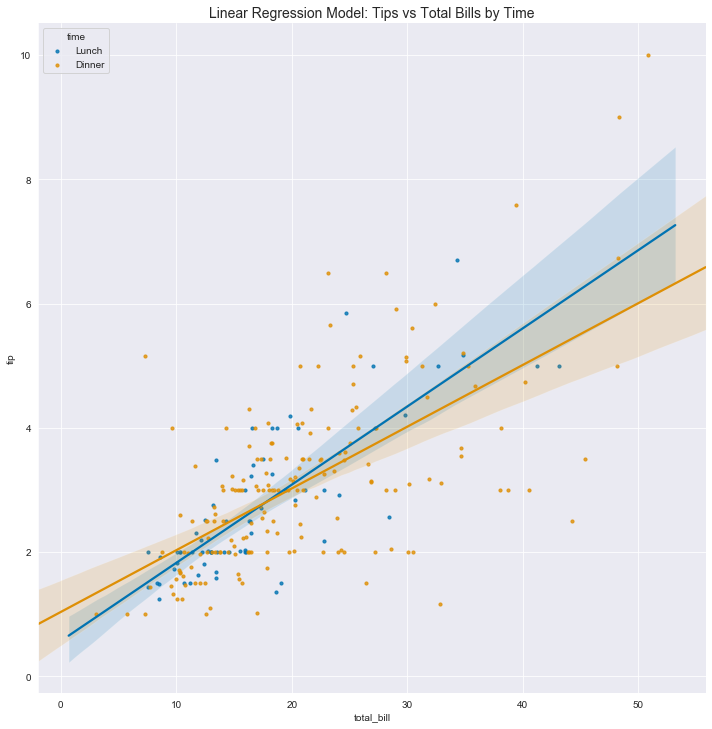

In [42]:
sns.lmplot(x="total_bill", y="tip", hue="time", ci=95, data=df, scatter_kws={"s": 10}, legend_out=False, height=10)

plt.title('Linear Regression Model: Tips vs Total Bills by Time', fontsize=14)

This time we get a pair of slightly different linear regression models. Again we can check their validity by plotting individually.

Text(0.5, 1.02, 'Linear Regression Model: Tips vs Total Bills by Time (Separate)')

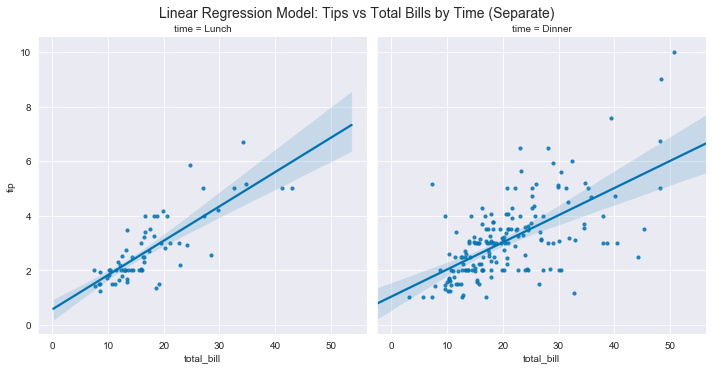

In [43]:
# Create 1x2 plots of individual lmplot per time
g = sns.lmplot(x="total_bill", y="tip", col="time", data=df, ci=95, scatter_kws={"s": 10})

g.fig.suptitle('Linear Regression Model: Tips vs Total Bills by Time (Separate)', y=1.02, fontsize=14)

The plot for Lunch looks quite good - the Dinner plot is more dispersed but is still acceptable.

#### Lunch

Taking Lunch, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills at Lunchtime')

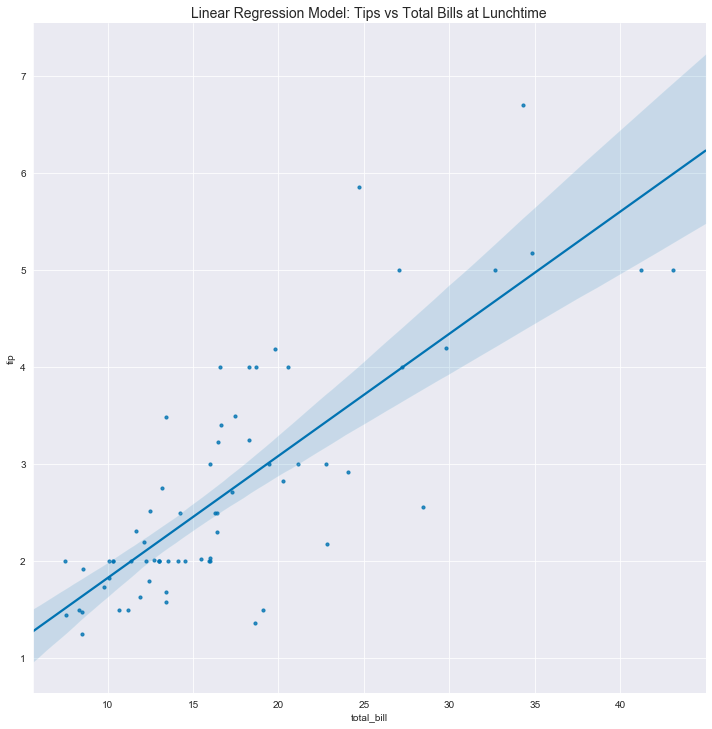

In [44]:
dfLunch = df.query('time == "Lunch"')

sns.lmplot(x="total_bill", y="tip", data=dfLunch , ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills at Lunchtime', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [45]:
# R Squared for Sunday
x = dfLunch["total_bill"]
y = dfLunch["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.80542384]
 [0.80542384 1.        ]]

R Squared:  0.6487075561600327


In [46]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Lunchtime: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Lunchtime: 
m: 0.12585284
c: 0.56736162


In [47]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Lunchtime: ", C)

Cost for Lunchtime:  34.19531637403248


The results are as follows:
* $R^2$: Around 64.87%
* Cost: Approx 34.20

These results are quite good - so far this is a much better fit than the overall dataset.

#### Dinner

Taking Dinner, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills at Dinner')

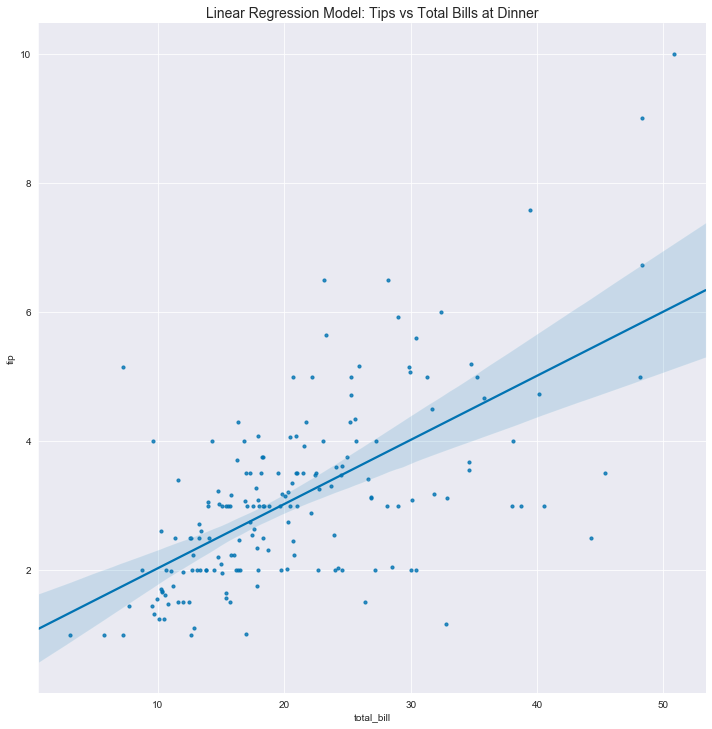

In [48]:
dfDinner = df.query('time == "Dinner"')

sns.lmplot(x="total_bill", y="tip", data=dfDinner , ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills at Dinner', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [49]:
# R Squared for Sunday
x = dfDinner["total_bill"]
y = dfDinner["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.63287125]
 [0.63287125 1.        ]]

R Squared:  0.4005260152611945


In [50]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Lunchtime: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Lunchtime: 
m: 0.09942615
c: 1.03488896


In [51]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Lunchtime: ", C)

Cost for Lunchtime:  216.40342129028699


The results are as follows:
* $R^2$: Around 40.05%
* Cost: Approx 216.40

These results are not as good as those for Lunch - this is actually a slightly worse fit than for the overall dataset.

#### Results

The impact of breaking it down by mealtime is somewhat difficult to judge - at lunchtime, the model is very encouraging, but at dinner time it is actually slightly worse. It will therefore be necessary to consider further options in order to determine how tip size and total bill size are related.

### Delving Deeper

Considering our findings so far, where do we go from here? There are other variables we can look at, but we probably won't make much progress by looking at them in isolation. We should look at combining some of the variables.

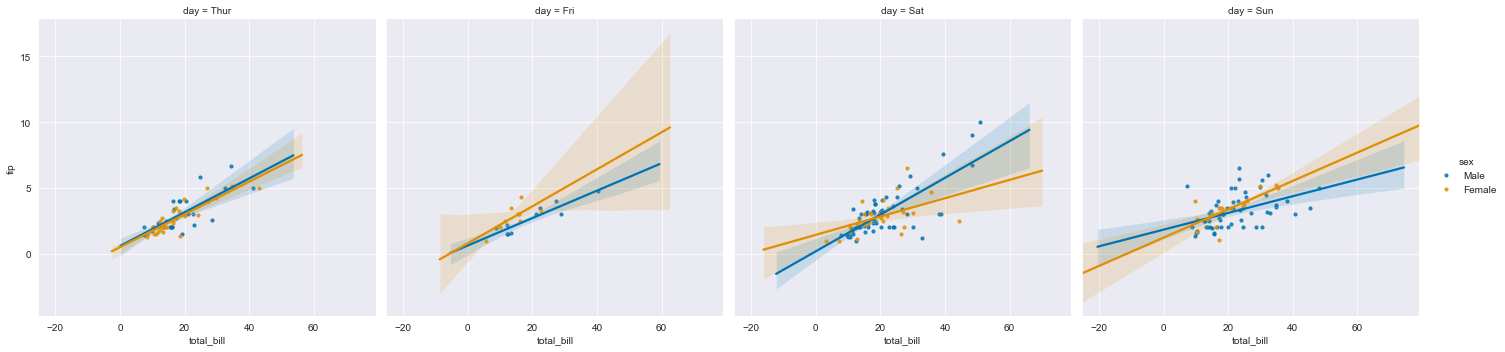

In [52]:
#sns.lmplot(x="total_bill", y="tip", row="day", col="time", hue="sex", data=df, ci=95, scatter_kws={"s": 10})
sns.lmplot(x="total_bill", y="tip", col="day", hue="sex", data=df, ci=95, scatter_kws={"s": 10})
#plt.title('Linear Regression Model: Tips vs Total Bills', fontsize=14)

Lets take a different approach now to working out how to maximise tips. We have already discovered that investigating variables in isolation can only provide a limited amount of information. Why not try and look at all of the data at once - but in an aggregated form?

The pandas.groupby()<sup>[12](#myfootnote12)</sup> function is ideally suited to this purpose. We can try it out by aggregating over a single variable, for example "size". The groupby() function needs a statistical function appended to it, we will try describe().

In [53]:
# pandas df.groupby() function with "size" as an index, output as df.describe()
df.groupby(["size"]).describe()

total_bill                                                               \
          count       mean       std    min      25%     50%      75%    max   
size                                                                           
1           4.0   7.242500  3.010729   3.07   6.2050   7.915   8.9525  10.07   
2         156.0  16.448013  6.043729   5.75  12.4525  15.370  19.6900  40.55   
3          38.0  23.277632  9.407065  10.33  16.9400  20.365  27.7750  50.81   
4          37.0  28.613514  8.608603  16.49  21.5000  25.890  34.8100  48.33   
5           5.0  30.068000  7.340396  20.69  28.1500  29.850  30.4600  41.19   
6           4.0  34.830000  9.382000  27.05  29.1125  32.050  37.7675  48.17   

        tip                                                          
      count      mean       std   min     25%    50%     75%    max  
size                                                                 
1       4.0  1.437500  0.506516  1.00  1.0000  1.415  1.8525   1.92  
2     156.0  2.582308  0.985501  1.00  2.0000  2.500  3.1450   5.85  
3      38.0  3.393158  1.557344  1.36  2.3575  3.290  3.6825  10.00  
4      37.0  4.135405  1.640668  2.00  3.0000  3.760  5.0700   9.00  
5       5.0  4.028000  1.440111  2.00  3.0000  5.000  5.0000   5.14  
6       4.0  5.225000  1.053170  4.20  4.8000  5.000  5.4250   6.70

The result is a table with "size" as the index. We get all of the normal df.describe() outputs, for the (non-indexed) numerical variables i.e. "total_bill" and "tip". We could look at the max tip size (€10.00 for a party of 3) and make an assumption, but it would be a better idea to take the distribution of the data into account due to the presence of outlier and the differences in inter-quartile ranges. Instead of this, the mean tip value is probably a better indicator of future earnings - predictably these generally increase with party size.

This is a good time to look at increasing the complexity of the aggregation also, so we will aggregate over "smoker" also.

In [54]:
a = df.groupby(["size", "smoker"]).mean()
print(a)

# Print the max of the mean tips
# Use numpy max function to deal with NaN values better than Python
print("\nMaximum mean tip: $"+"{:.2f}".format(np.max(a["tip"]),2))

# Create a tuple of the multiindex value for the row where the max value is
b = a.index[a['tip'] == np.max(a["tip"])].tolist()
print("Size: ", b[0][0])
print("Smoker ", b[0][1])

             total_bill       tip
size smoker                      
1    Yes       5.825000  1.460000
     No        8.660000  1.415000
2    Yes      17.955758  2.709545
     No       15.342333  2.489000
3    Yes      28.191667  4.095000
     No       21.009615  3.069231
4    Yes      30.609091  3.992727
     No       27.769231  4.195769
5    Yes      29.305000  2.500000
     No       30.576667  5.046667
6    Yes            NaN       NaN
     No       34.830000  5.225000

Maximum mean tip: $5.22
Size:  6
Smoker  No


This is very encouraging! We can easily extend this to aggregate over more variables.

In [55]:
a = df.groupby(["day", "time", "smoker", "size", "sex"]).mean()
print(a)

# Print the max of the mean tips
# Use numpy max function to deal with NaN values better than Python
print("\nMaximum mean tip: $"+"{:.2f}".format(np.max(a["tip"]),2))

b = a.index[a['tip'] == np.max(a["tip"])].tolist()
print("Day: ", b[0][0])
print("Time: ", b[0][1])
print("Smoker: ", b[0][2])
print("Size: ", b[0][3])
print("Sex: ", b[0][4])

                                total_bill     tip
day  time   smoker size sex                       
Thur Lunch  Yes    1    Male           NaN     NaN
                        Female         NaN     NaN
                   2    Male      19.05875  2.8225
                        Female    14.99000  2.5400
                   3    Male      18.71000  4.0000
...                                    ...     ...
Sun  Dinner No     4    Female    29.91500  4.3900
                   5    Male      20.69000  5.0000
                        Female    29.85000  5.1400
                   6    Male      48.17000  5.0000
                        Female         NaN     NaN

[192 rows x 2 columns]

Maximum mean tip: $6.70
Day:  Thur
Time:  Lunch
Smoker:  No
Size:  6
Sex:  Male


Can we therefore say that the highest average tip comes from tables of 6 Male non-smokers on Thursdays at lunchtime. Probably not - this may well be an outlier! Do we have enough data to back this up?

In [56]:
c = df.groupby(["day", "time", "smoker", "size", "sex"]).get_group(("Thur", "Lunch", "No", 6, "Male")).count()

print("Number of records matching criteria: ", c.tip)

Number of records matching criteria:  1


This isn't ideal. Can we base our decisions off a single data point? Of course not - we will need to take a different approach! It might be a good idea to reduce the complexity of the grouping by removing an index. It is a reasonable assumption that larger parties will have larger bills and therefore larger tips - we had an $R^2$ of around 45% earlier for this which indicates a linear model (if not a great one). Lets try a similar approach to above by excluding the "size" variable now.

In [57]:
a = df.groupby(["day", "time", "smoker", "sex"]).mean()
print(a)
print("\nMaximum mean tip: $"+"{:.2f}".format(np.max(a["tip"]),2))

b = a.index[a['tip'] == np.max(a["tip"])].tolist()
print("Day: ", b[0][0])
print("Time: ", b[0][1])
print("Smoker: ", b[0][2])
print("Sex: ", b[0][3])

                           total_bill       tip      size
day  time   smoker sex                                   
Thur Lunch  Yes    Male     19.171000  3.058000  2.300000
                   Female   19.218571  2.990000  2.428571
            No     Male     18.486500  2.941500  2.500000
                   Female   15.899167  2.437083  2.500000
     Dinner Yes    Male           NaN       NaN       NaN
                   Female         NaN       NaN       NaN
            No     Male           NaN       NaN       NaN
                   Female   18.780000  3.000000  2.000000
Fri  Lunch  Yes    Male     11.386667  1.900000  1.666667
                   Female   13.260000  2.660000  2.000000
            No     Male           NaN       NaN       NaN
                   Female   15.980000  3.000000  3.000000
     Dinner Yes    Male     25.892000  3.246000  2.400000
                   Female   12.200000  2.700000  2.000000
            No     Male     17.475000  2.500000  2.000000
              

And now we'll check how many records match the criteria:

In [58]:
c = df.groupby(["day", "time", "smoker", "sex"]).get_group(("Thur", "Lunch", "No", "Male")).count()

print("Number of records matching criteria: ", c.tip)

Number of records matching criteria:  20


Ok, this seems to be based on a reasonable nubmer of observations. We should consider now if this gives us enough information to maximise the tips earnings - probably not as it only covers a single, very specific, condition. We could generate an order of preference by sorting the dataframe. For convenience we'll keep it in order of Day and Time, with descending maximum mean tip size for the other variables. This could be then be used as a convenient reference sheet whilst working.

In [59]:
# Generate a sorted dataframe
refsheet = a.sort_values(by=["day", "time", "tip"], ascending=[True, True, False])

# Drop the "size" column
refsheet = refsheet.drop(columns=["size"])

# Drop the rows containing no data
round(refsheet.dropna(),2)

total_bill   tip
day  time   smoker sex                     
Thur Lunch  Yes    Male         19.17  3.06
                   Female       19.22  2.99
            No     Male         18.49  2.94
                   Female       15.90  2.44
     Dinner No     Female       18.78  3.00
Fri  Lunch  No     Female       15.98  3.00
            Yes    Female       13.26  2.66
                   Male         11.39  1.90
     Dinner No     Female       22.75  3.25
            Yes    Male         25.89  3.25
                   Female       12.20  2.70
            No     Male         17.48  2.50
Sat  Dinner No     Male         19.93  3.26
            Yes    Male         21.84  2.88
                   Female       20.27  2.87
            No     Female       19.00  2.72
Sun  Dinner Yes    Male         26.14  3.52
                   Female       16.54  3.50
            No     Female       20.82  3.33
                   Male         20.40  3.12

This would easily allow the waiter to choose between different tables (with identically sized parties) based on their characteristics. Unfortunately the differences in mean tips are mostly quite small so it may not be worth the effort!

### Multiple Linear Regression

An alternative approach we could try is to create a multiple linear regression model. This can be done with the statsmodel package<sup>[13](#myfootnote13)</sup>. We'll look at the data for Thursday first. It will be necessary to convert all categorical variable to "dummy" variables first.

In [60]:
# Use pandas to convert categorical values to binary/ dummy values
dummydf = pd.get_dummies(dfThur)

Now we must drop one of each pair of dummy columns to prevent collinearity<sup>[14](#myfootnote14)</sup>, as these column pairs are not independent of each other and this would affect the results.

In [61]:
# Now drop one of each pair of dummy columns to prevent collinearity
catdf = dummydf.drop(columns=["sex_Female", "smoker_No", "time_Dinner"])

# Also drop the day columns as these are redundant
catdf = catdf.drop(columns=["day_Thur", "day_Fri", "day_Sat", "day_Sun"])

catdf

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch
77,27.20,4.00,4,1,0,1
78,22.76,3.00,2,1,0,1
79,17.29,2.71,2,1,0,1
80,19.44,3.00,2,1,1,1
81,16.66,3.40,2,1,0,1
...,...,...,...,...,...,...
202,13.00,2.00,2,0,1,1
203,16.40,2.50,2,0,1,1
204,20.53,4.00,4,1,1,1
205,16.47,3.23,3,0,1,1


We now have a dataframe ready to use. We can move on to generate the model. Ideally we should check that all variables have a linear fit but for now we will assume that they do and move on to the model. We are looking for it to output a constant as well as a coefficient for each variable that would allow prediction of the tip from inputs. This would take the following form:

$$ Y'_i = b_0 + b_1 X_1 + b_2 X_2 + b_2 X_2$$

Where:
* $Y'_i$  = Predicted Tip
* $b_0$= Constant
* $b_1$ = Coefficient for sex_Male
* $X_1$ = Binary value for sex_Male
* $b_2$ = Coefficient for smoker_Yes
* $X_2$ = Binary value for smoker_Yes
* $b_3$ = Coefficient for time_Lunch
* $X_3$ = Binary value for time_Lunch

In [62]:
# Import the statsmodel package
import statsmodels.api as sm

# Also import the warnings package to suppress statsmodel future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [63]:
# Create x value from the categorical variables
x_val = catdf[["sex_Male","smoker_Yes","time_Lunch" ]]

# Add a constant
x_val = sm.add_constant(x_val)

#Use tip as the y value
y_val = catdf["tip"]

# Fit the model
mlmodel = sm.OLS(y_val, x_val).fit()

# Output a summary
mlmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8384
Date:                Fri, 29 Nov 2019   Prob (F-statistic):              0.478
Time:                        13:06:42   Log-Likelihood:                -99.502
No. Observations:                  62   AIC:                             207.0
Df Residuals:                      58   BIC:                             215.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0000      1.245      2.409      0.019       0.508       5.492
sex_Male       0.3848      0.321      1.198      0.236      -0.258       1.028
smoker_Yes     0.3122      0.358      0.872      0.387      -0.405       1.029
time_Lunch    -0.5086      1.268     -0.401      0.690      -3.046       2.029
==============================================================================
Omnibus:                       14.274   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.699
Skew:                           1.174   Prob(JB):                     0.000390
Kurtosis:                       3.753   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our constant and coefficient have been generated, however the (adjusted) $R^2$ value of -0.008 is discouraging. We should accept that this approach is not going to be successful.

## Conclusions

Seaborn and Pandas work very well together for manipulating a dataset and displaying the data, statistics and visualistions that you need.

Tips are generally slightly higher at weekends, particulary on Sundays although this is not very well correlated with the total bill amount.

It is possible to use the categorical variables (i.e. whether the smokers or not and which gender) for particular shifts to assess which table is likely to leave a larger tip, but the caveat on this is that the difference in mean tip value is not particularly large and may not be worth the effort. It is probably a better approach in general to serve larger parties as they will tend to have larger bills and leave larger tips. 

## References

<a name="myfootnote1">1</a>: Laerd Statistics - Histograms, https://statistics.laerd.com/statistical-guides/understanding-histograms.php  
<a name="myfootnote2">2</a>: Mathisonian - KDE, https://mathisonian.github.io/kde/  
<a name="myfootnote3">3</a>: WhatIs.com - Skewness, https://whatis.techtarget.com/definition/skewness  
<a name="myfootnote4">4</a>: Geeks for Geeks - Python | Pandas.melt() https://www.geeksforgeeks.org/python-pandas-melt/  
<a name="myfootnote5">5</a>: Stat Trek - Boxplot, https://stattrek.com/statistics/charts/boxplot.aspx  
<a name="myfootnote6">6</a>: Lisa Sullivan (Boston University School of Public Health), http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Confidence_Intervals/BS704_Confidence_Intervals_print.html  
<a name="myfootnote7">7</a>: Ben Alex Keen - Correlation in Python, http://benalexkeen.com/correlation-in-python/  
<a name="myfootnote8">8</a>: SPSS Tutorials - Pearson Correlation Coefficient, https://www.spss-tutorials.com/pearson-correlation-coefficient/  
<a name="myfootnote9">9</a>: The Minitab Blog - Regression Analysis: How Do I Interpret R-squared and Assess the Goodness-of-Fit?, https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit  
<a name="myfootnote10">10</a>: Lachlan Miller (Medium.com) - Understanding and Calculating the Cost Function for Linear Regression, https://medium.com/@lachlanmiller_52885/understanding-and-calculating-the-cost-function-for-linear-regression-39b8a3519fcb  
<a name="myfootnote10">11</a>: Seaborn Tutorial - Regression, https://seaborn.pydata.org/tutorial/regression.html  
<a name="myfootnote10">12</a>: Shane Lynn - Summarising, Aggregating, and Grouping data in Python Pandas, https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
<a name="myfootnote10">13</a>: Data to Fish - Example of Multiple Linear Regression in Python, https://datatofish.com/multiple-linear-regression-python/  
<a name="myfootnote10">14</a>: Texas A&M University Statistics - Collinearity of Independent Variables, http://www.stat.tamu.edu/~hart/652/collinear.pdf